In [3]:
import pandas as pd 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#####  Importing DataSet

In [4]:
df=pd.read_json("Sarcasm_Headlines_Dataset (1).json", lines=True )

In [5]:
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB


In [8]:
df.is_sarcastic.unique()

array([1, 0])

In [9]:
df.dtypes

is_sarcastic     int64
headline        object
article_link    object
dtype: object

In [10]:
df.describe()

,is_sarcastic
count,28619.000000
mean,0.476397
std,0.499451
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


##### Checking for null values in dataset

In [7]:
df.isna().sum()

is_sarcastic    0
headline        0
article_link    0
dtype: int64

##### Performing feature engineering to draw out new column 'Source' from existing column 'article_link'

In [11]:
df['source'] = df.article_link.apply(lambda x: x.split('.')[1])
df = df.drop('article_link', axis=1)
df.shape

(28619, 3)

In [12]:
df.head(2)

,is_sarcastic,headline,source
0,1,thirtysomething scientists unveil doomsday clo...,theonion
1,0,dem rep. totally nails why congress is falling...,huffingtonpost


In [13]:
df.source.unique()

array(['theonion', 'huffingtonpost'], dtype=object)

Text(0.5, 0, 'Target')

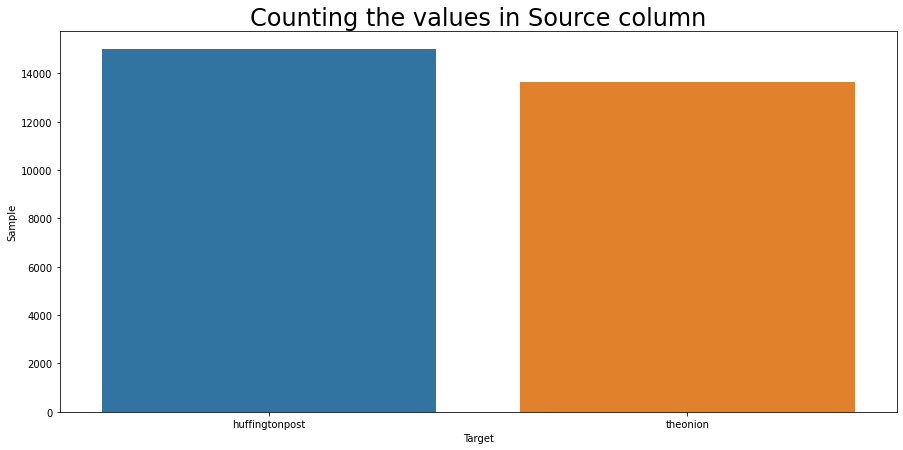

In [14]:
target_counts=df['source'].value_counts()
plt.figure(figsize = (15,7))
sns.barplot(y=target_counts,x=target_counts.index)
plt.title("Counting the values in Source column",fontsize = 24)
plt.ylabel('Sample')
plt.xlabel('Target')

##### Drawing out all the words from the headline feature 

In [15]:
all_words = df['headline'].str.split(expand=True).unstack().value_counts()
all=pd.DataFrame(all_words).reset_index()
all_words

to           9045
of           6252
the          5281
in           4521
for          3617
             ... 
implosion       1
islam,          1
things...       1
vampires'       1
business,       1
Length: 38234, dtype: int64

##### Frequently occuring words in headlines

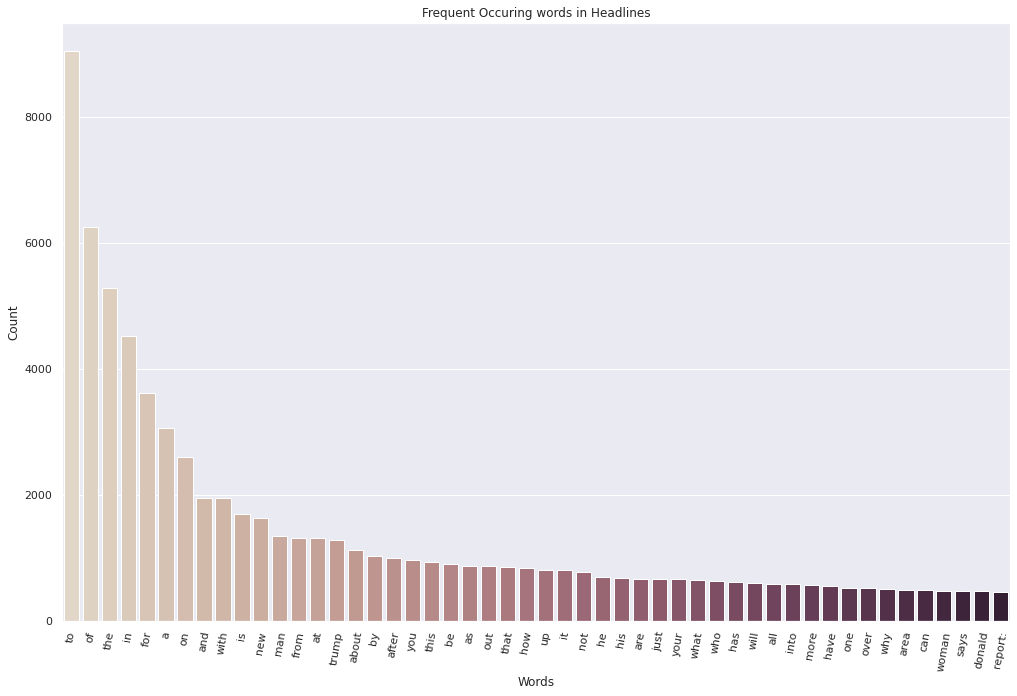

In [16]:
sns.set(rc={'figure.figsize':(17,11)})
sns.barplot(x=all['index'][0:50], y=all[0][0:50], data=all,palette="ch:.25",errcolor='.26')
plt.xlabel('Words')  
plt.ylabel('Count') 
plt.title("Frequent Occuring words in Headlines") 
plt.xticks(rotation=80);

In [17]:
all_words = df['headline'].str.split(expand=True).unstack().value_counts()
all_words

to           9045
of           6252
the          5281
in           4521
for          3617
             ... 
implosion       1
islam,          1
things...       1
vampires'       1
business,       1
Length: 38234, dtype: int64

In [18]:
non_sarc=pd.DataFrame(df[df['is_sarcastic']==0]['headline'].str.split(expand=True).unstack().value_counts()).reset_index()
non_sarc

,index,0
0,the,4593
1,to,4065
2,of,2462
3,a,2443
4,in,2417
...,...,...
25016,excused,1
25017,umpires,1
25018,'creamed',1
25019,televisa,1


In [19]:
sarc=pd.DataFrame(df[df['is_sarcastic']==1]['headline'].str.split(expand=True).unstack().value_counts()).reset_index()
sarc

,index,0
0,to,4980
1,of,3790
2,in,2104
3,for,1736
4,on,1286
...,...,...
23923,robs,1
23924,skylight,1
23925,jughead,1
23926,$945.23,1


##### Frequent Occuring non-sarcastic words in Headlines

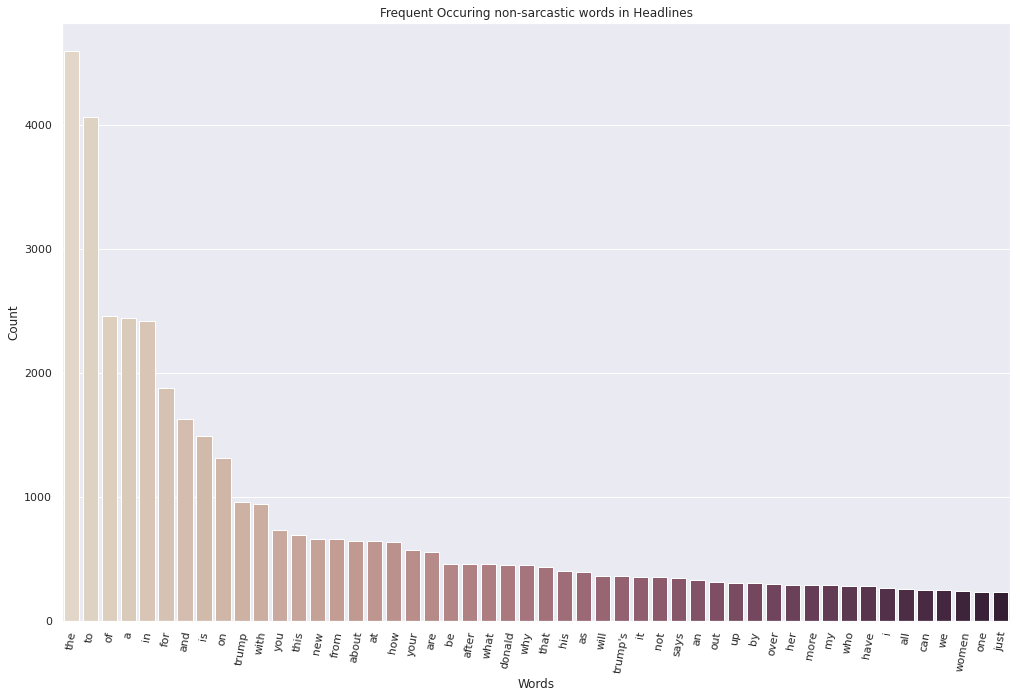

In [20]:
sns.set(rc={'figure.figsize':(17,11)})
sns.barplot(x=non_sarc['index'][0:50], y=non_sarc[0][0:50], data=non_sarc,palette="ch:.25")
plt.xlabel('Words')  
plt.ylabel('Count')  
plt.title("Frequent Occuring non-sarcastic words in Headlines") 
plt.xticks(rotation=80);

##### Frequent Occuring sarcastic words in Headlines

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

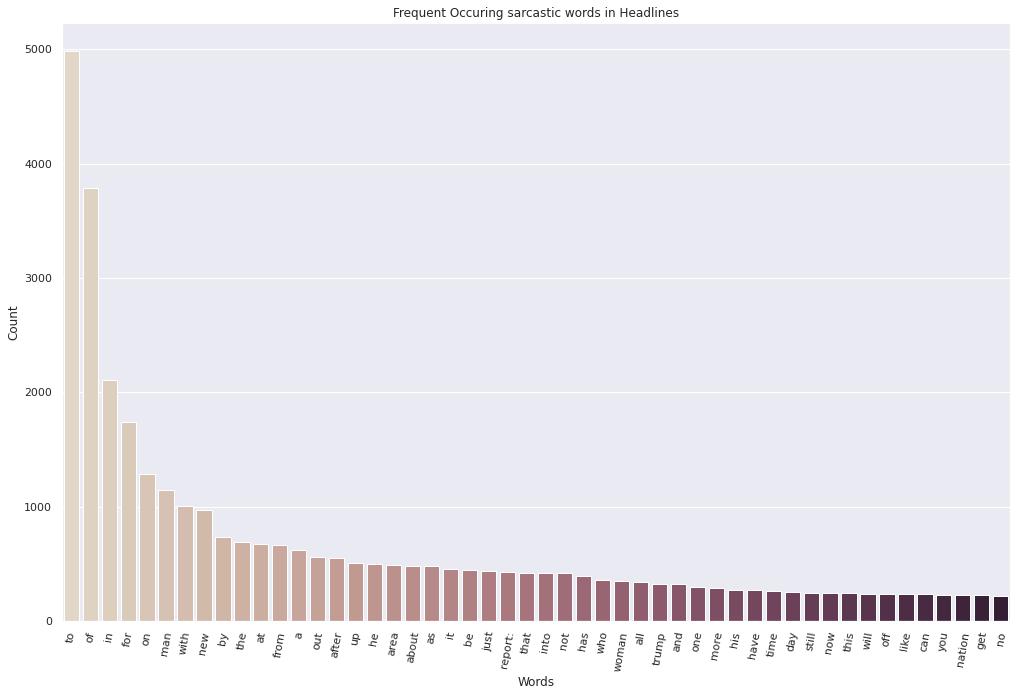

In [21]:
sns.set(rc={'figure.figsize':(17,11)})
sns.barplot(x=sarc['index'][0:50], y=sarc[0][0:50], data=sarc,palette="ch:.25")
plt.xlabel('Words')  
plt.ylabel('Count')  
plt.title("Frequent Occuring sarcastic words in Headlines") 
plt.xticks(rotation=80)

TFIDF


In [22]:
import nltk
from nltk.corpus import wordnet

##### word_tokenizing the sarcastic words

In [24]:
import nltk
sar_tokens = df[df['is_sarcastic'] == 1]['headline'].apply(lambda x: nltk.word_tokenize(x)) 
sar_tokens[:10]

0     [thirtysomething, scientists, unveil, doomsday...
3     [inclement, weather, prevents, liar, from, get...
4     [mother, comes, pretty, close, to, using, word...
7     [richard, branson, 's, global-warming, donatio...
8     [shadow, government, getting, too, large, to, ...
14    [ford, develops, new, suv, that, runs, purely,...
16    [area, boy, enters, jumping-and-touching-tops-...
17    [area, man, does, most, of, his, traveling, by...
21    [guard, in, video, game, under, strict, orders...
25    [secret, service, agent, not, so, secret, abou...
Name: headline, dtype: object

##### word_tokenizing the sarcastic words

In [25]:
nonsar_tokens = df[df['is_sarcastic'] == 0]['headline'].apply(lambda x: nltk.word_tokenize(x))
nonsar_tokens[:10]

1     [dem, rep., totally, nails, why, congress, is,...
2     [eat, your, veggies, :, 9, deliciously, differ...
5                              [my, white, inheritance]
6     [5, ways, to, file, your, taxes, with, less, s...
9             [lots, of, parents, know, this, scenario]
10    [this, lesbian, is, considered, a, father, in,...
11    [amanda, peet, told, her, daughter, sex, is, '...
12    [what, to, know, regarding, current, treatment...
13    [chris, christie, suggests, hillary, clinton, ...
15    [uber, ceo, travis, kalanick, stepping, down, ...
Name: headline, dtype: object

##### preprocesing both sarcastic word and non sarcastic words by remoing stopword and converting into lower case.

In [27]:
stopwords = nltk.corpus.stopwords.words('english')
sarc_lower=[each_word.lower() for each_word in sarc['index']] #lowcase
sarc_nostop = [word for word in sarc_lower if word not in stopwords]
non_sarc_lower=[each_word.lower() for each_word in non_sarc['index']]
non_sarc_nostop = [word for word in non_sarc_lower if word not in stopwords]

In [28]:
sarc_lower[:5]

['to', 'of', 'in', 'for', 'on']

In [29]:
non_sarc_lower[0:5]

['the', 'to', 'of', 'a', 'in']

#### World Cloud 

In [30]:
from wordcloud import WordCloud, ImageColorGenerator

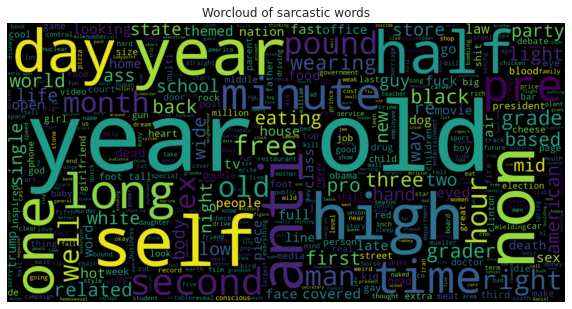

In [31]:
plt.figure(figsize = (10,10))
wc = WordCloud(width = 2000 , height = 1000 , max_words = 500).generate(' '.join(word for word in sarc_nostop))
plt.axis("off")
plt.title('Worcloud of sarcastic words')
plt.imshow(wc , interpolation = 'bilinear')

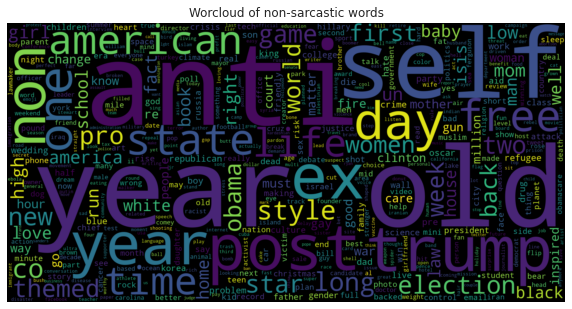

In [32]:
plt.figure(figsize = (10,10))
wc = WordCloud(width = 2000 , height = 1000 , max_words = 500).generate(' '.join(word for word in non_sarc_nostop))
plt.axis("off")
plt.title('Worcloud of non-sarcastic words')
plt.imshow(wc , interpolation = 'bilinear')

#### Preparing X and y

creating parser() function which drop any special character and then removes the stopwords from it and then synset checks for synonymous  words in wordnet dictonary


In [33]:
nltk.download('wordnet')
import re
def parser(x):
    x = re.sub('[^a-z\s]', '', x.lower())  #drop any symbol except a-z
    x = [w for w in x.split() if w not in set(stopwords)]
    x = [w for w in x if wordnet.synsets(w)]
    return ' '.join(x)

df['headline'] = df.headline.apply(lambda x: parser(x))
X = df['headline']
y = df.is_sarcastic

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [34]:
len(X)

28619

In [35]:
len(y)

28619

##### Splitting X and y 

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [37]:
len(X_train)

20033

In [38]:
len(y_train)

20033

In [39]:
len(X_test)

8586

In [40]:
len(y_test)

8586

#### TFIDF Vectorizer 

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [42]:
cv=TfidfVectorizer()

In [43]:
X_cv_train = cv.fit_transform(X_train)
X_cv_test = cv.transform(X_test)

In [44]:
X_cv_train

<20033x18083 sparse matrix of type '<class 'numpy.float64'>'
	with 127009 stored elements in Compressed Sparse Row format>

In [46]:
X_cv_train

<20033x18083 sparse matrix of type '<class 'numpy.float64'>'
	with 127009 stored elements in Compressed Sparse Row format>

In below, the output clearly states that all element are saved in vector of numpy in row format

### Finding the best model using GridSearchCV

In [45]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)


In [49]:

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'DecisionTreeClassifier' : {
            'model':  DecisionTreeClassifier(),
            'params': {
                "criterion":['gini'],
                 "max_depth":[4],
                  "random_state":[1]
            }
        },
        'LogisticRegression': {
            'model': LogisticRegression(),
            'params': {
                 "C":[1.0]
                
            }
        },
          'MultinomialNB': {
            'model': MultinomialNB(),
            'params': {
                "alpha":[1.0], 
                "class_prior":[None], 
                "fit_prior":[True]

            }
        },
        'svm': {
            'model': svm.SVC(),
            'params': {
                'C': [0.1, 1], 
              'gamma': [1, 0.1],
              'kernel': ["linear", "sigmoid"]
            }
        },
        'RandomForestClassifier': {
            'model': RandomForestClassifier(),
            'params': {
                 "criterion":['gini'],
                  "n_estimators":[12], 
                  "random_state":[42]
                
            }
        
    }
    }
    
    scores = []

    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X_cv_train,y_train)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,DecisionTreeClassifier,0.577639,"{'criterion': 'gini', 'max_depth': 4, 'random_..."
1,LogisticRegression,0.773546,{'C': 1.0}
2,MultinomialNB,0.780684,"{'alpha': 1.0, 'class_prior': None, 'fit_prior..."
3,svm,0.773646,"{'C': 1, 'gamma': 1, 'kernel': 'linear'}"
4,RandomForestClassifier,0.738158,"{'criterion': 'gini', 'n_estimators': 12, 'ran..."


According to table, Multinomial Naive Bayes is stands out by 78% score but thats not enough

So, going with naive bayes, tried to ran model using defaults

In [56]:
 from sklearn.naive_bayes import MultinomialNB

In [57]:
nb=MultinomialNB()
nb.fit(X_cv_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [58]:
nb.score(X_cv_train, y_train)

0.8971696700444267

Score is now .89 which is far better.

In [64]:
print('accuracy:', sklearn.metrics.accuracy_score(y_test,y_pred_nb))
print('f1-score:', sklearn.metrics.f1_score(y_test,y_pred_nb))

accuracy: 0.7825529932448172
f1-score: 0.7572487322844883


In [62]:
import sklearn
y_pred_nb= nb.predict(X_cv_test)
print(sklearn.metrics.classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80      4560
           1       0.79      0.72      0.76      4026

    accuracy                           0.78      8586
   macro avg       0.78      0.78      0.78      8586
weighted avg       0.78      0.78      0.78      8586

